1. Logistic regression, LDA, CART on conrtaceptive method excel sheet

In [1531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing regression modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier

In [1532]:
#read data
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

Data Ingestion: 
    
2.1.1 Read the dataset.

2.1.2 Do the descriptive statistics

2.1.3 do null value condition check

2.1.4check for duplicates

2.1.5 Check for outliers and write an inference on it.

2.1.6 Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [1533]:
df.shape

(1473, 10)

In [1534]:
#2.1.2
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [1535]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [1536]:
df.shape

(1473, 10)

The given dataset contains 1473 rows and 10 columns.

In [1537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


#insights from info:

There are 8 independent variables, 1 dependent variable(Contraceptive_method_used)

1. wife_age seems to be a number but is float 64. Need to change datatype for wife_age
2. wife_age has some null values.
3. no_of_children born is also a float type which ideally has to be integer.
4. wife_religion also has some null values.
5. Husband_occupation is a random categorical variable which is interpreted as integer. Need to change it as well.

In [1538]:
#print value counts of all object datatypes
obj_df = df.select_dtypes(include  ='object')
#print(obj_df.columns)
for i in obj_df.columns:
    print("value counts for ", i,'\n', df[i].value_counts(),'\n')

value counts for  Wife_ education 
 Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64 

value counts for  Husband_education 
 Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64 

value counts for  Wife_religion 
 Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64 

value counts for  Wife_Working 
 No     1104
Yes     369
Name: Wife_Working, dtype: int64 

value counts for  Standard_of_living_index 
 Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64 

value counts for  Media_exposure  
 Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64 

value counts for  Contraceptive_method_used 
 Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64 



In [1539]:
#initial summary of the data.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#inisghts from summary:
1. Average wife_age is around 32 years with 25% of women in between 39 and 49 years.
2. Most of the wives and husbands are having education level 'Tertiary'
3. Maximum number of children born is 16 which might need to be reviewed to be an outlier.
4. Average number of children born are 3 this might indicate that women who have children have also used contraceptive method.
5. Husband occupation is better understood after converting it to categorical.
6. most of the families are media_exposed.
7. Around half of the people in the given dataset have used contraceptive method and half haven't used.

In [1540]:
#2.1.3
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [1542]:
#wife_age and no_of_children_born are having null values
#replace null values of wife_age with media/mean age
#both have same values in this case. so replacing with median
df.Wife_age = df.Wife_age.fillna(df.Wife_age.median())

In [1543]:
df.Wife_age.isnull().sum()

0

In [1544]:
#replacing number of born with zeroes
df.No_of_children_born = df.No_of_children_born.fillna(0)

In [1545]:
df.No_of_children_born.isnull().sum()

0

In [1546]:
df.Wife_age.value_counts()

32.0    133
25.0     77
26.0     66
24.0     60
35.0     59
29.0     58
30.0     58
28.0     58
22.0     55
27.0     55
33.0     52
36.0     49
37.0     48
34.0     46
21.0     44
23.0     43
31.0     43
38.0     43
47.0     41
45.0     40
42.0     38
44.0     38
39.0     34
43.0     34
40.0     34
41.0     32
48.0     30
20.0     27
49.0     23
46.0     21
19.0     17
17.0      8
18.0      6
16.0      3
Name: Wife_age, dtype: int64

In [1547]:
#converting data type for wife_age to int
df.Wife_age = df.Wife_age.astype('int64')

In [1548]:
df.No_of_children_born = df.No_of_children_born.astype('int64')

In [1549]:
df.No_of_children_born.value_counts()

2     274
1     273
3     255
4     192
5     131
0     118
6      90
7      49
8      46
9      16
10     11
11     11
12      4
13      2
16      1
Name: No_of_children_born, dtype: int64

In [1550]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [1551]:
#husband occupation column has to be categorical and the categories are random.
#changing datatype to object
df.Husband_Occupation = df.Husband_Occupation.astype('category')

There are around 29 records in the data whose families are 10 or more children.
However having 16 children does not seem to be practical and retaining them is subject to business decision.

Since we are interpreting the column as a categorical variable we can interpret values greater than 10 as single category.

In [1552]:
df.No_of_children_born = np.where(df.No_of_children_born >= 10, 10, df.No_of_children_born)

In [1553]:
df.No_of_children_born = df.No_of_children_born.astype('category')

In [1554]:
#Changing all datatypes to category since all are categorical in this case.

for i in df.select_dtypes(include = 'object'):
    df[i] = pd.Categorical(df[i])

In [1555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Wife_age                   1473 non-null   int64   
 1   Wife_ education            1473 non-null   category
 2   Husband_education          1473 non-null   category
 3   No_of_children_born        1473 non-null   category
 4   Wife_religion              1473 non-null   category
 5   Wife_Working               1473 non-null   category
 6   Husband_Occupation         1473 non-null   category
 7   Standard_of_living_index   1473 non-null   category
 8   Media_exposure             1473 non-null   category
 9   Contraceptive_method_used  1473 non-null   category
dtypes: category(9), int64(1)
memory usage: 26.2 KB


In [1556]:
#2.1.5
df.duplicated().sum()

83

In [1557]:
#there are 83 duplicates in the data, 
#remove them to further proceed with the analysis.

In [1558]:
df.drop_duplicates(inplace = True)

In [1559]:
df.duplicated().sum()

0

In [1560]:
df.shape

(1390, 10)

In [1561]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [1562]:
#removing unnecessary spaces in wide_education, media_exposure
df.rename(columns={"Wife_ education": "Wife_education", "Media_exposure ": "Media_exposure"}, inplace = True)

In [1563]:
df.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [1564]:
#printing the summary of fresh data
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1390.0,NaN,NaN,NaN,32.531655,8.09688,16.0,26.0,32.0,38.0,49.0
Wife_education,1390,4,Tertiary,512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1390,4,Tertiary,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1390.0,11.0,1.0,257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_religion,1390,2,Scientology,1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1390,2,No,1042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1390.0,4.0,3.0,570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard_of_living_index,1390,4,Very High,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1390,2,Exposed,1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1390,2,Yes,776,NaN,NaN,NaN,NaN,NaN,NaN,NaN


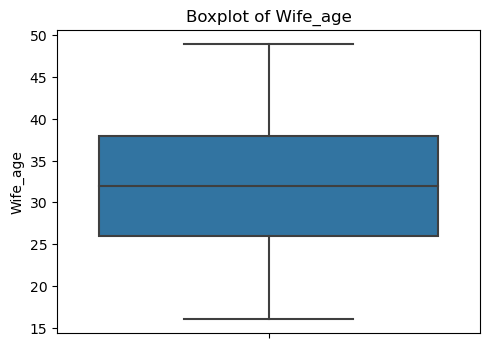

In [1565]:
#check for outliers
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (5,10))
feature_list = df_numeric.columns
for i in range(len(feature_list)):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(y = df_numeric[feature_list[i]], data = df_numeric)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1566]:
#wife age does not have any outliers.

In [1567]:
#2.1.6
#Univariate analysis:
#histplot of numeric variables
#value_counts normalization of categorical variables
#count plots of categorical variables

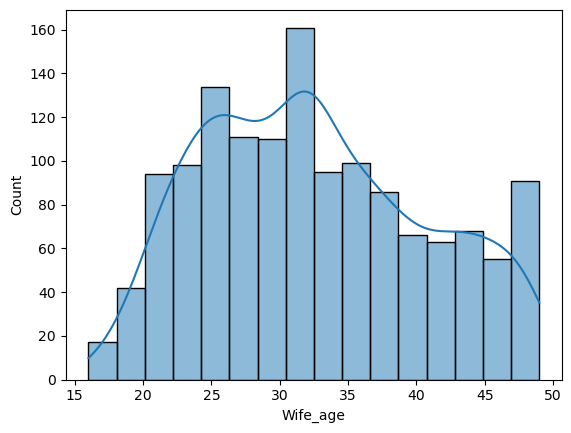

In [1568]:
#Univariate analysis
sns.histplot(x = 'Wife_age', data = df, kde = True);

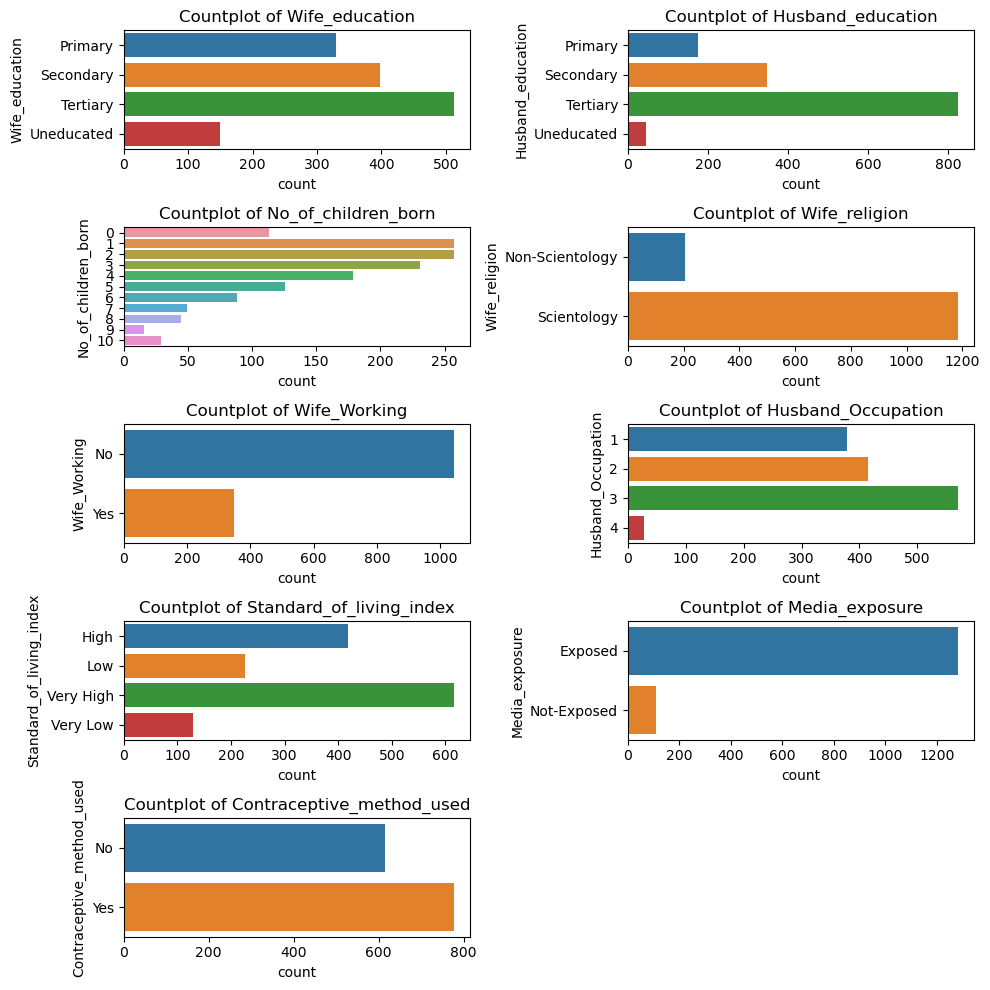

In [1569]:
#univariate analysis of all categorical variables
#check for outliers
df_cat = df.select_dtypes(include = ['category'])
plt.figure(figsize = (10,10))
feature_list = df_cat.columns
for i in range(len(feature_list)):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y = df_cat[feature_list[i]], data = df_cat)
    plt.title('Countplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1570]:
#print value counts of all object datatypes
obj_df = df.select_dtypes(include  ='category')
#print(obj_df.columns)
for i in obj_df.columns:
    print("value counts for ", i,'\n', df[i].value_counts(normalize = True),'\n')

value counts for  Wife_education 
 Tertiary      0.368345
Secondary     0.286331
Primary       0.237410
Uneducated    0.107914
Name: Wife_education, dtype: float64 

value counts for  Husband_education 
 Tertiary      0.592806
Secondary     0.249640
Primary       0.125899
Uneducated    0.031655
Name: Husband_education, dtype: float64 

value counts for  No_of_children_born 
 1     0.184892
2     0.184892
3     0.166187
4     0.128777
5     0.090647
0     0.081295
6     0.063309
7     0.035252
8     0.032374
10    0.020863
9     0.011511
Name: No_of_children_born, dtype: float64 

value counts for  Wife_religion 
 Scientology        0.851799
Non-Scientology    0.148201
Name: Wife_religion, dtype: float64 

value counts for  Wife_Working 
 No     0.74964
Yes    0.25036
Name: Wife_Working, dtype: float64 

value counts for  Husband_Occupation 
 3    0.410072
2    0.297842
1    0.272662
4    0.019424
Name: Husband_Occupation, dtype: float64 

value counts for  Standard_of_living_index 
 Ve

Insights from univariate analysis:
    
1. numeric variables:
    Wife_age follows a normal distribution with 2 mild peaks
    No_of_children also follows a normal distirbution.

In [1571]:
#Bivariate analysis
#analysis of each independent variable with dependent categorical variable.
#numeric vs numeric - pairplot/scatterplot, correlation/heatmap
#cat vs cat - countplot with hue
#cat vs numeric - box plot - x as cat, y as numeric

In [1572]:
#all categorical independent variables with Contraceptive_method_used

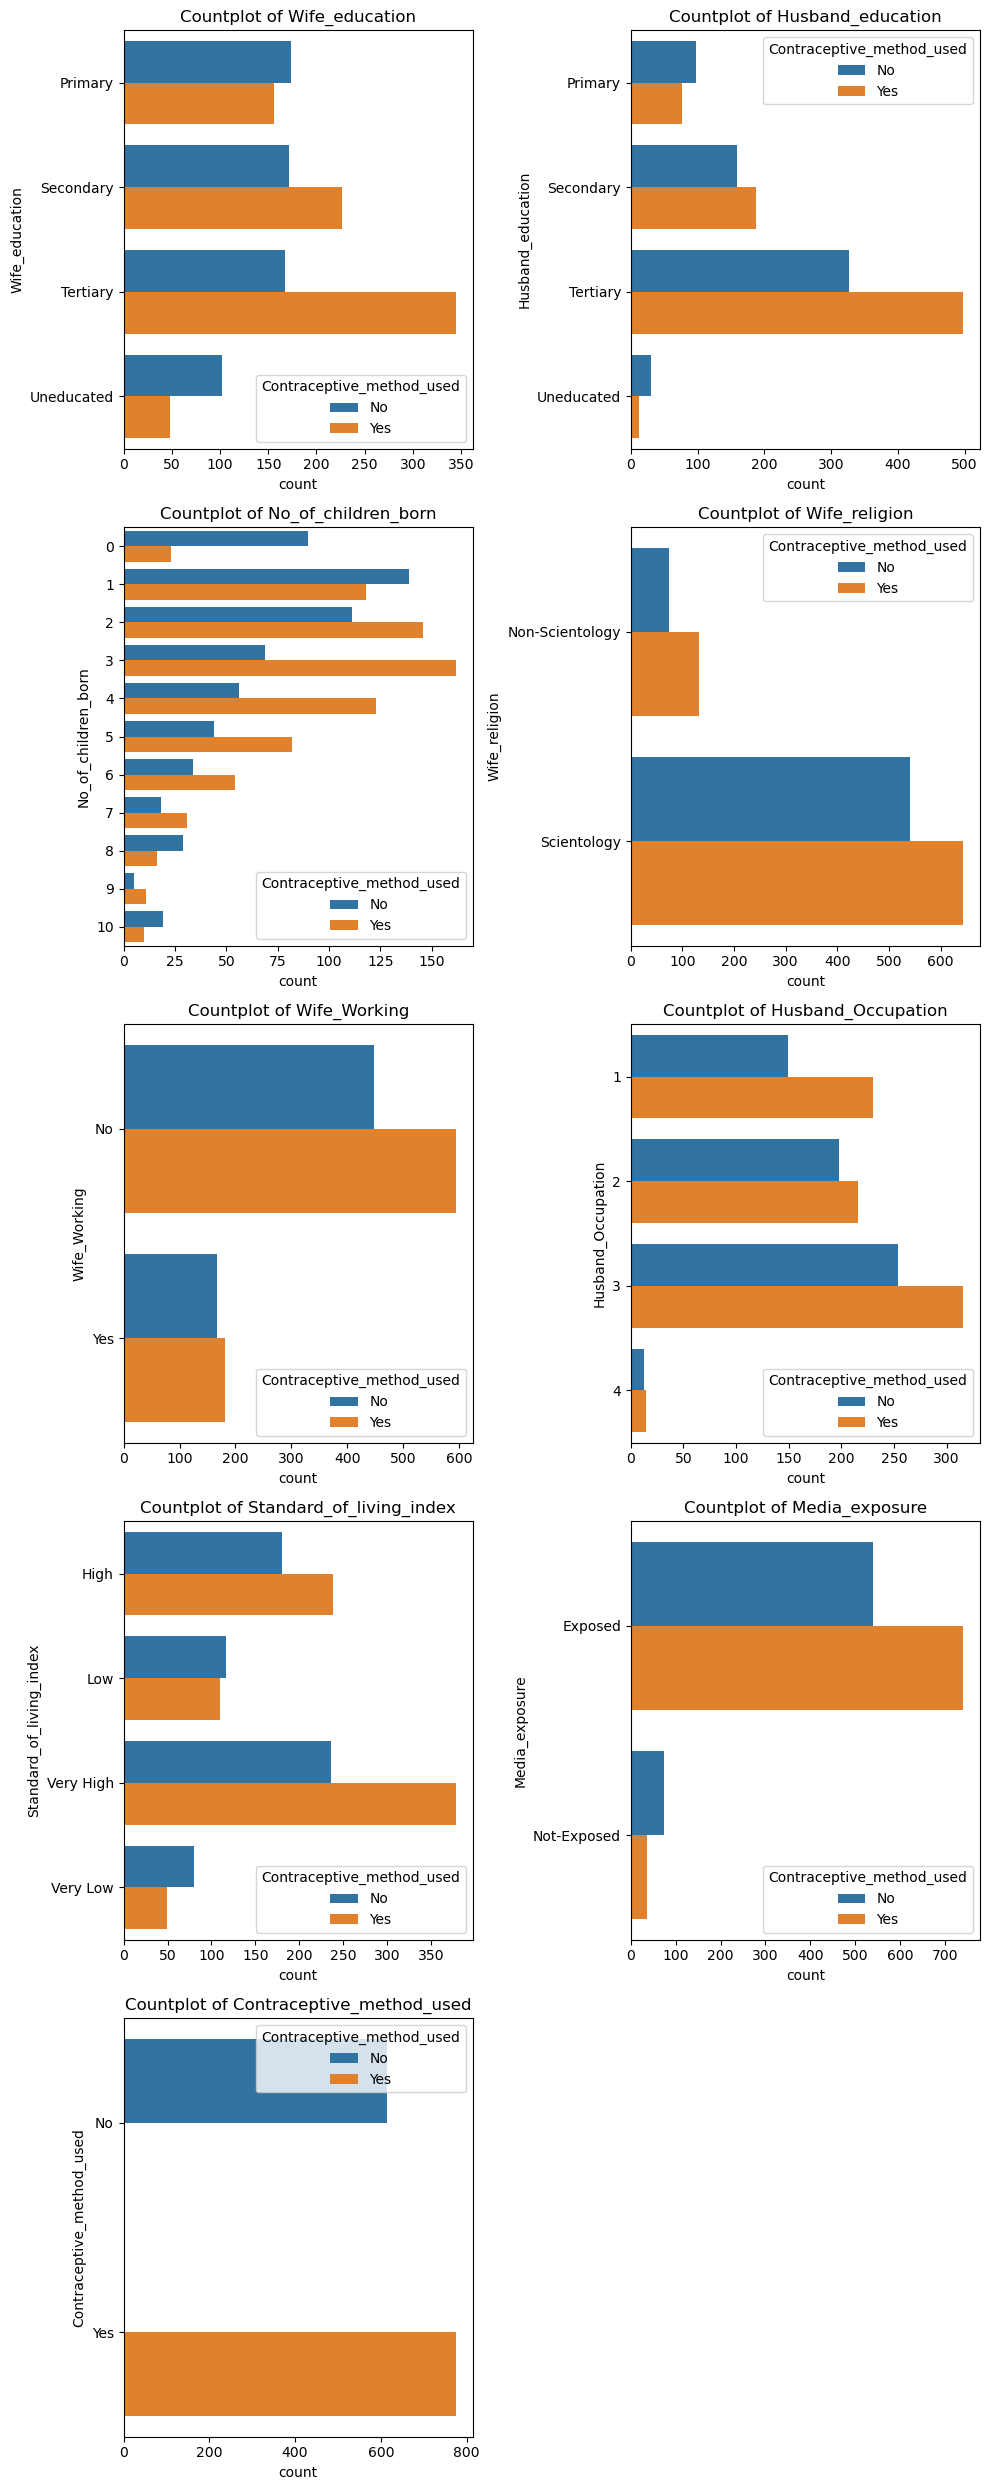

In [1573]:
#univariate analysis of all categorical variables
#check for outliers
df_cat = df.select_dtypes(include = ['category'])
plt.figure(figsize = (10,25))
feature_list = df_cat.columns
for i in range(len(feature_list)):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y = df_cat[feature_list[i]], hue = 'Contraceptive_method_used', data = df_cat)
    plt.title('Countplot of {}'.format(feature_list[i]))
    plt.tight_layout()

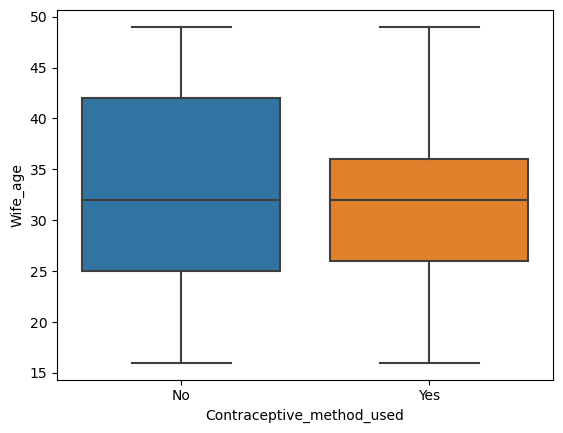

In [1574]:
sns.boxplot(y = 'Wife_age', x = 'Contraceptive_method_used', data = df);

In [1575]:
#low aged women used contraceptive method than high aged.
#wives more number of children have used contraceptive method.

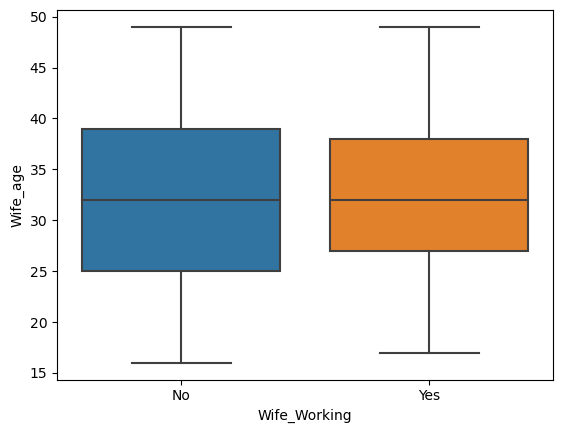

In [1576]:
sns.boxplot(y = 'Wife_age', x = 'Wife_Working', data = df);

In [1577]:
#multivariate analysis

#pd.crosstab(train_data.Fuel_Type, train_data.Transmission, margins = True, values=train_data.Price, aggfunc='mean')
#sns.factorplot(x= "Seats",y = "Mileage_converted",col= "Transmission",col_wrap=4, data=train_data,kind="box", ci= False,palette='bright',aspect=1,)

#g = sns.FacetGrid(train_data, col="Fuel_Type", hue="Owner_Type")
#g.map(sns.scatterplot, "Seats", "Price", alpha=.7)
#g.add_legend()

In [1578]:
pd.crosstab(df.Husband_education, df.Wife_education, margins = True, values=df[df.Contraceptive_method_used == 'Yes'].Contraceptive_method_used, aggfunc='count', normalize = True)

Wife_education,Primary,Secondary,Tertiary,Uneducated,All
Husband_education,,,,,
Primary,0.055412,0.014175,0.001289,0.028351,0.099227
Secondary,0.074742,0.118557,0.030928,0.018041,0.242268
Tertiary,0.065722,0.155928,0.411082,0.009021,0.641753
Uneducated,0.005155,0.003866,0.001289,0.006443,0.016753
All,0.201031,0.292526,0.444588,0.061856,1.000000


In [1579]:
pd.crosstab(df.Wife_Working, df.Husband_Occupation, margins = True, values=df[df.Contraceptive_method_used == 'Yes'].Contraceptive_method_used, aggfunc='count', normalize = True)

Husband_Occupation,1,2,3,4,All
Wife_Working,,,,,
No,0.220361,0.207474,0.326031,0.012887,0.766753
Yes,0.076031,0.070876,0.081186,0.005155,0.233247
All,0.296392,0.278351,0.407216,0.018041,1.000000


In [1580]:
pd.crosstab(df.Standard_of_living_index, df.Media_exposure , margins = True, values=df[df.Contraceptive_method_used == 'Yes'].Contraceptive_method_used, aggfunc='count', normalize = True)

Media_exposure,Exposed,Not-Exposed,All
Standard_of_living_index,,,
High,0.300258,0.006443,0.306701
Low,0.122423,0.019330,0.141753
Very High,0.478093,0.010309,0.488402
Very Low,0.054124,0.009021,0.063144
All,0.954897,0.045103,1.000000


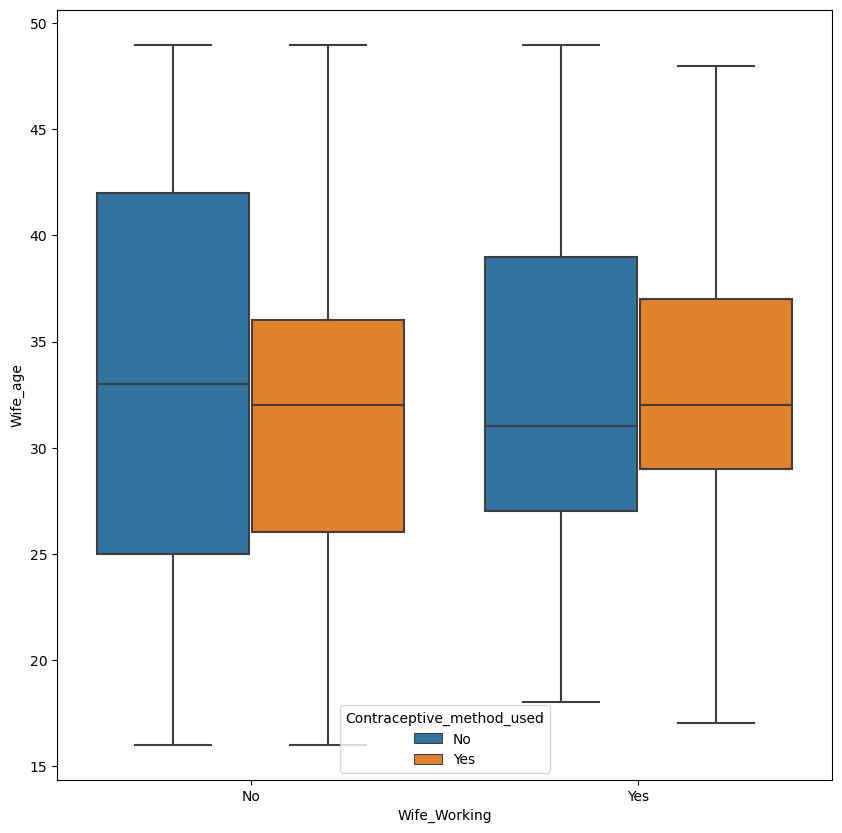

In [1581]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Wife_Working', y = 'Wife_age', hue = 'Contraceptive_method_used', data = df);

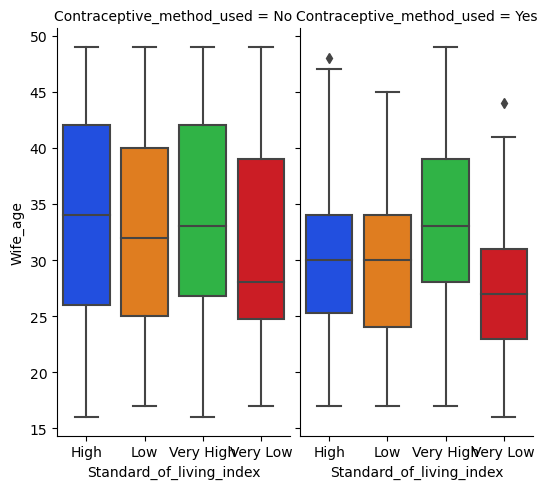

In [1582]:
f = sns.catplot(x= "Standard_of_living_index",y = "Wife_age", col= "Contraceptive_method_used", col_wrap=4, data=df, kind="box",ci= False,palette='bright',aspect=1, )
f.fig.set_size_inches(10,5)

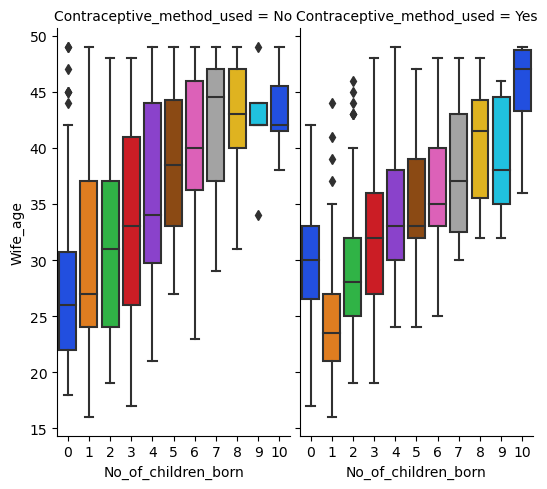

In [1583]:
f = sns.catplot(x= "No_of_children_born",y = "Wife_age", col= "Contraceptive_method_used", col_wrap=4, data=df, kind="box",ci= False,palette='bright',aspect=1, )
f.fig.set_size_inches(10,5)

2.2

Do not scale the data.

Encode the data (having string values) for Modelling.

Data Split: Split the data into train and test (70:30).
    
Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [1584]:
#encode the data having string values for modelling.
df_new = pd.get_dummies(data = df, columns = df_cat.columns,drop_first = True)

In [1585]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 1472
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Wife_age                            1390 non-null   int64
 1   Wife_education_Secondary            1390 non-null   uint8
 2   Wife_education_Tertiary             1390 non-null   uint8
 3   Wife_education_Uneducated           1390 non-null   uint8
 4   Husband_education_Secondary         1390 non-null   uint8
 5   Husband_education_Tertiary          1390 non-null   uint8
 6   Husband_education_Uneducated        1390 non-null   uint8
 7   No_of_children_born_1               1390 non-null   uint8
 8   No_of_children_born_2               1390 non-null   uint8
 9   No_of_children_born_3               1390 non-null   uint8
 10  No_of_children_born_4               1390 non-null   uint8
 11  No_of_children_born_5               1390 non-null   uint8
 12  No_of_

In [1586]:
#using df_new for logistic regression, lda models

In [1587]:
df_new.head()

,Wife_age,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,No_of_children_born_1,No_of_children_born_2,No_of_children_born_3,...,Wife_religion_Scientology,Wife_Working_Yes,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure_Not-Exposed,Contraceptive_method_used_Yes
0,24,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,45,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,43,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,42,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,36,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [1588]:
df_new.tail()

,Wife_age,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,No_of_children_born_1,No_of_children_born_2,No_of_children_born_3,...,Wife_religion_Scientology,Wife_Working_Yes,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure_Not-Exposed,Contraceptive_method_used_Yes
1468,33,0,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,1,0,0,1
1469,33,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1470,39,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
1471,33,1,0,0,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1
1472,17,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1


In [1589]:
#separating out independent and dependent variables
X = df_new.drop('Contraceptive_method_used_Yes', axis = 1)
y = df_new.Contraceptive_method_used_Yes

In [1590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [1591]:
params = {'penalty':['l2','none'],
         'solver':['sag','newton-cg'],}

In [1592]:
model = LogisticRegression(n_jobs=-1)

In [1593]:
grid_search = GridSearchCV(estimator=model,param_grid=params, cv = 3 , n_jobs=-1,scoring='f1')

In [1594]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'newton-cg']},
             scoring='f1')

In [1595]:
grid_search.best_estimator_

LogisticRegression(n_jobs=-1, penalty='none', solver='newton-cg')

In [1596]:
log_reg_model = grid_search.best_estimator_ #best model coming from best_estimator

In [1597]:
#log_reg_model = LogisticRegression(solver='newton-cg',penalty='none',verbose=True,n_jobs=-1)
log_reg_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, penalty='none', solver='newton-cg')

In [1598]:
log_reg_model.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(n_jobs=-1, penalty='none', solver='newton-cg')>

In [1599]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = log_reg_model.predict(X_train)
y_test_predicted = log_reg_model.predict(X_test)

In [1600]:
#building probability matrix on training data
y_train_predicted_prob = log_reg_model.predict_proba(X_train)
y_train_df = pd.DataFrame(y_train_predicted_prob)

In [1601]:
y_train_df.head()

,0,1
0,0.188111,0.811889
1,0.119583,0.880417
2,0.227578,0.772422
3,0.164813,0.835187
4,0.762136,0.237864


In [1602]:
#building probability matrix on test data
y_test_predicted_prob = log_reg_model.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

In [1603]:
y_test_df.head()

,0,1
0,0.915619,0.084381
1,0.639021,0.360979
2,0.257000,0.743000
3,0.240676,0.759324
4,0.252505,0.747495


In [1604]:
#Accuracy of model on training data
log_reg_model.score(X_train, y_train)

0.7225077081192189

In [1605]:
#Accuracy of model on test data
log_reg_model.score(X_test, y_test)

0.6762589928057554

In [1606]:
#Confusion matrix on training data
metrics.confusion_matrix(y_train, y_train_predicted)

array([[242, 181],
       [ 89, 461]], dtype=int64)

In [1607]:
print(metrics.classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       423
           1       0.72      0.84      0.77       550

    accuracy                           0.72       973
   macro avg       0.72      0.71      0.71       973
weighted avg       0.72      0.72      0.72       973



In [1608]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       191
           1       0.66      0.81      0.73       226

    accuracy                           0.68       417
   macro avg       0.68      0.66      0.66       417
weighted avg       0.68      0.68      0.67       417



C:\Users\yamin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


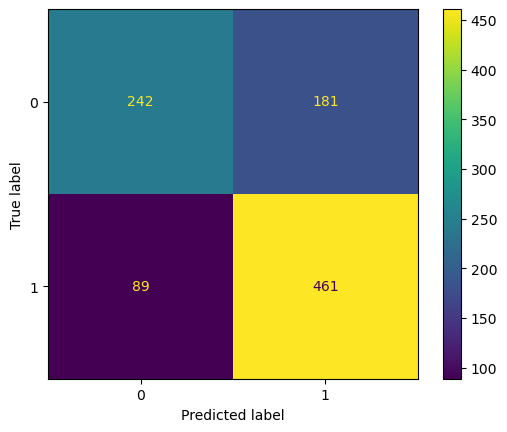

In [1609]:
metrics.plot_confusion_matrix(log_reg_model, X_train, y_train);

In [1610]:
#Confusion matrix on test data
metrics.confusion_matrix(y_test, y_test_predicted)

array([[ 98,  93],
       [ 42, 184]], dtype=int64)

C:\Users\yamin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


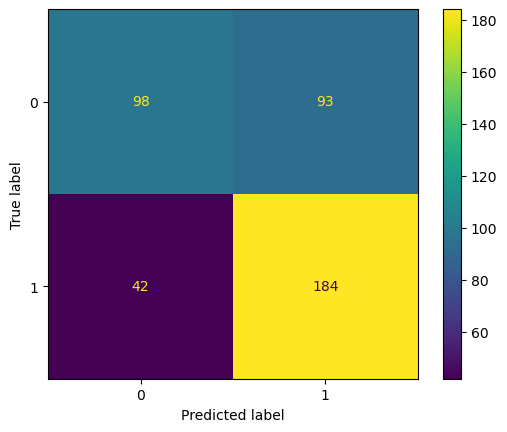

In [1611]:
metrics.plot_confusion_matrix(log_reg_model, X_test, y_test)

AUC 0.7676789168278529


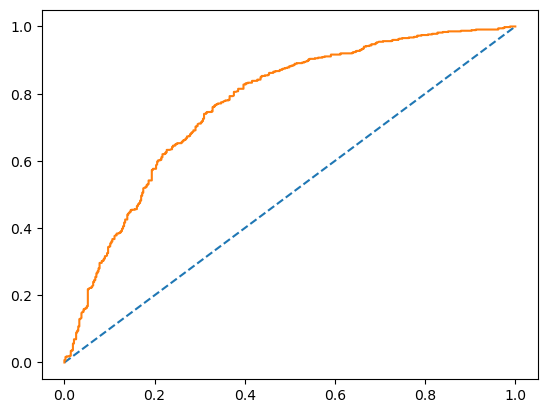

In [1612]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = roc_auc_score(y_train, y_train_predicted_prob1)
print('AUC', auc)
# calculate roc curve
train_fpr, train_tpr , _ = roc_curve(y_train, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [1613]:
#ROC curve on test data
#ROC_AOC curve on test data

AUC 0.7234513274336283


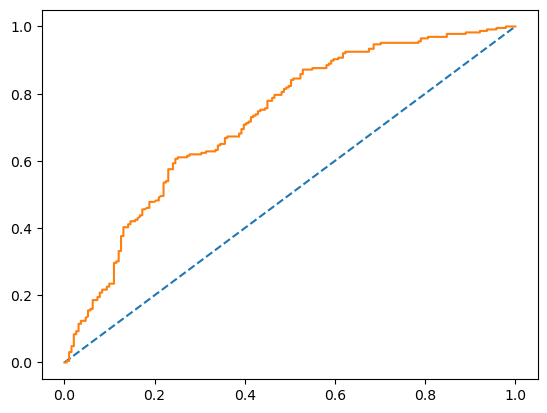

In [1614]:
#ROC curve on training data
#ROC_AUC score on training data

#y_test_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC', auc)
# calculate roc curve
train_fpr, train_tpr , _ = roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [1615]:
### LDA

#separating out independent and dependent variables
X = df_new.drop('Contraceptive_method_used_Yes', axis = 1)
y = df_new.Contraceptive_method_used_Yes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [1616]:
np.round(lda_model.coef_, 2)

array([[-0.09,  0.44,  1.07, -0.24, -0.  , -0.09, -0.05,  1.13,  1.86,
         2.77,  3.15,  3.02,  3.25,  3.39,  2.26,  4.4 ,  2.75, -0.32,
        -0.09, -0.14,  0.1 ,  0.96, -0.25,  0.21, -0.91, -0.31]])

In [1617]:
X_train.columns

Index(['Wife_age', 'Wife_education_Secondary', 'Wife_education_Tertiary',
       'Wife_education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'No_of_children_born_1', 'No_of_children_born_2',
       'No_of_children_born_3', 'No_of_children_born_4',
       'No_of_children_born_5', 'No_of_children_born_6',
       'No_of_children_born_7', 'No_of_children_born_8',
       'No_of_children_born_9', 'No_of_children_born_10',
       'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2',
       'Husband_Occupation_3', 'Husband_Occupation_4',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure_Not-Exposed'],
      dtype='object')

In [1618]:
lda_model.intercept_

array([0.83389084])

In [1619]:
# Training Data Class Prediction with a cut-off value of 0.5
y_train_predicted = lda_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
y_test_predicted = lda_model.predict(X_test)

In [1620]:
#building probability matrix on training data
y_train_predicted_prob = lda_model.predict_proba(X_train)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.175636,0.824364
1,0.112941,0.887059
2,0.217452,0.782548
3,0.153660,0.846340
4,0.752638,0.247362


In [1621]:
#building probability matrix on test data
y_test_predicted_prob = lda_model.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.916088,0.083912
1,0.622876,0.377124
2,0.247417,0.752583
3,0.231228,0.768772
4,0.239941,0.760059


In [1622]:
#Accuracy of model on training data
print('Accuracy of LDA model on training data:', lda_model.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of LDA model on test data:', lda_model.score(X_test, y_test))

Accuracy of LDA model on training data: 0.7266187050359713
Accuracy of LDA model on test data: 0.6786570743405276


In [1623]:
#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


Classification report for training data:

              precision    recall  f1-score   support

           0       0.75      0.56      0.64       423
           1       0.72      0.85      0.78       550

    accuracy                           0.73       973
   macro avg       0.73      0.71      0.71       973
weighted avg       0.73      0.73      0.72       973

Classification report for test data:

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       191
           1       0.67      0.82      0.73       226

    accuracy                           0.68       417
   macro avg       0.69      0.67      0.66       417
weighted avg       0.68      0.68      0.67       417



[[238 185]
 [ 81 469]]


C:\Users\yamin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


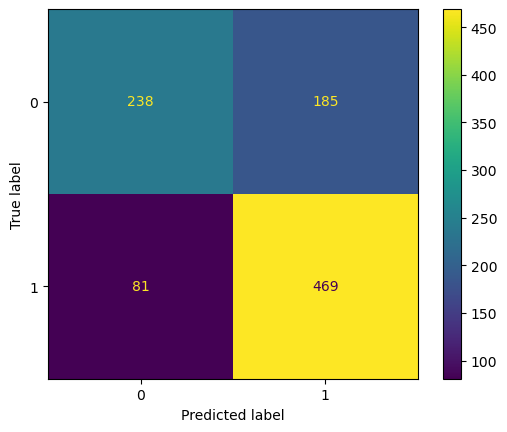

In [1624]:
#confusion matrix for training data
print(metrics.confusion_matrix(y_train, y_train_predicted))


print(metrics.plot_confusion_matrix(lda_model, X_train, y_train));

[[ 98  93]
 [ 41 185]]


C:\Users\yamin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


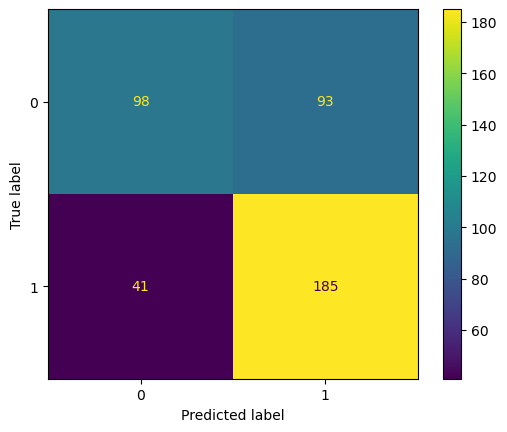

In [1625]:
#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(lda_model, X_test, y_test))

AUC 0.7672748764238126


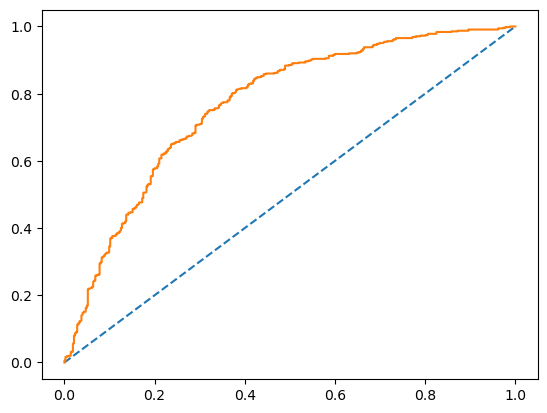

In [1626]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = roc_auc_score(y_train, y_train_predicted_prob1)
print('AUC', auc)
# calculate roc curve
train_fpr, train_tpr , _ = roc_curve(y_train, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC 0.7250034749571421


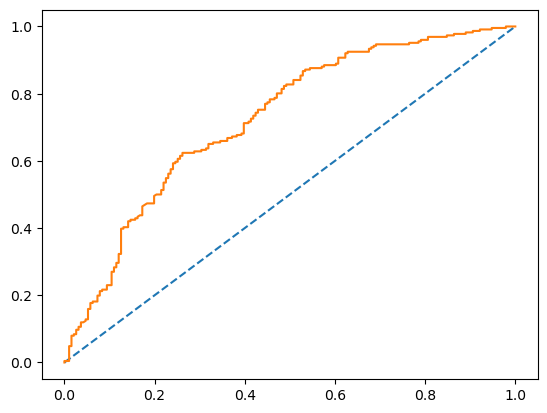

In [1627]:
#ROC curve on test data
#ROC_AOC curve on test data

#ROC curve on training data
#ROC_AUC score on training data

#y_test_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC', auc)
# calculate roc curve
train_fpr, train_tpr , _ = roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

### CART

In [1628]:
#decision tree in python can only take numeric/categorical columns, it cannot take string/object types.

dfc = df.copy()

In [1629]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Wife_age                   1390 non-null   int64   
 1   Wife_education             1390 non-null   category
 2   Husband_education          1390 non-null   category
 3   No_of_children_born        1390 non-null   category
 4   Wife_religion              1390 non-null   category
 5   Wife_Working               1390 non-null   category
 6   Husband_Occupation         1390 non-null   category
 7   Standard_of_living_index   1390 non-null   category
 8   Media_exposure             1390 non-null   category
 9   Contraceptive_method_used  1390 non-null   category
dtypes: category(9), int64(1)
memory usage: 67.9 KB


In [1630]:
dfc.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,Primary,Secondary,3,Scientology,No,2,High,Exposed,No
1,45,Uneducated,Secondary,10,Scientology,No,3,Very High,Exposed,No
2,43,Primary,Secondary,7,Scientology,No,3,Very High,Exposed,No
3,42,Secondary,Primary,9,Scientology,No,3,High,Exposed,No
4,36,Secondary,Secondary,8,Scientology,No,3,Low,Exposed,No


In [1631]:
#converting all uint columns in dataset to categorical
for feature in dfc.select_dtypes(exclude = ['int64']).columns: 
    print('\n')
    print('feature:',feature)
    print(pd.Categorical(dfc[feature].unique()))
    print(pd.Categorical(dfc[feature].unique()).codes)
    dfc[feature] = pd.Categorical(dfc[feature]).codes
    dfc[feature] = dfc[feature].astype('category')
        



feature: Wife_education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: No_of_children_born
[3, 10, 7, 9, 8, ..., 6, 1, 2, 4, 5]
Length: 11
Categories (11, int64): [0, 1, 2, 3, ..., 7, 8, 9, 10]
[ 3 10  7  9  8  0  6  1  2  4  5]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Husband_Occupation
[2, 3, 1, 4]
Categories (4, int64): [1, 2, 3, 4]
[1 2 0 3]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure
['Exposed', 'Not-Exposed']
Cat

In [1632]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Wife_age                   1390 non-null   int64   
 1   Wife_education             1390 non-null   category
 2   Husband_education          1390 non-null   category
 3   No_of_children_born        1390 non-null   category
 4   Wife_religion              1390 non-null   category
 5   Wife_Working               1390 non-null   category
 6   Husband_Occupation         1390 non-null   category
 7   Standard_of_living_index   1390 non-null   category
 8   Media_exposure             1390 non-null   category
 9   Contraceptive_method_used  1390 non-null   category
dtypes: category(9), int64(1)
memory usage: 67.9 KB


In [1633]:
dfc.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,0,1,3,1,0,1,0,0,0
1,45,3,1,10,1,0,2,2,0,0
2,43,0,1,7,1,0,2,2,0,0
3,42,1,0,9,1,0,2,0,0,0
4,36,1,1,8,1,0,2,1,0,0


In [1634]:
#separating out independent and dependent variables
X = dfc.drop('Contraceptive_method_used', axis = 1)
y = dfc.Contraceptive_method_used

In [1635]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [1636]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini',random_state=1)

In [1637]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [1638]:
from sklearn import tree
import matplotlib.pyplot as plt

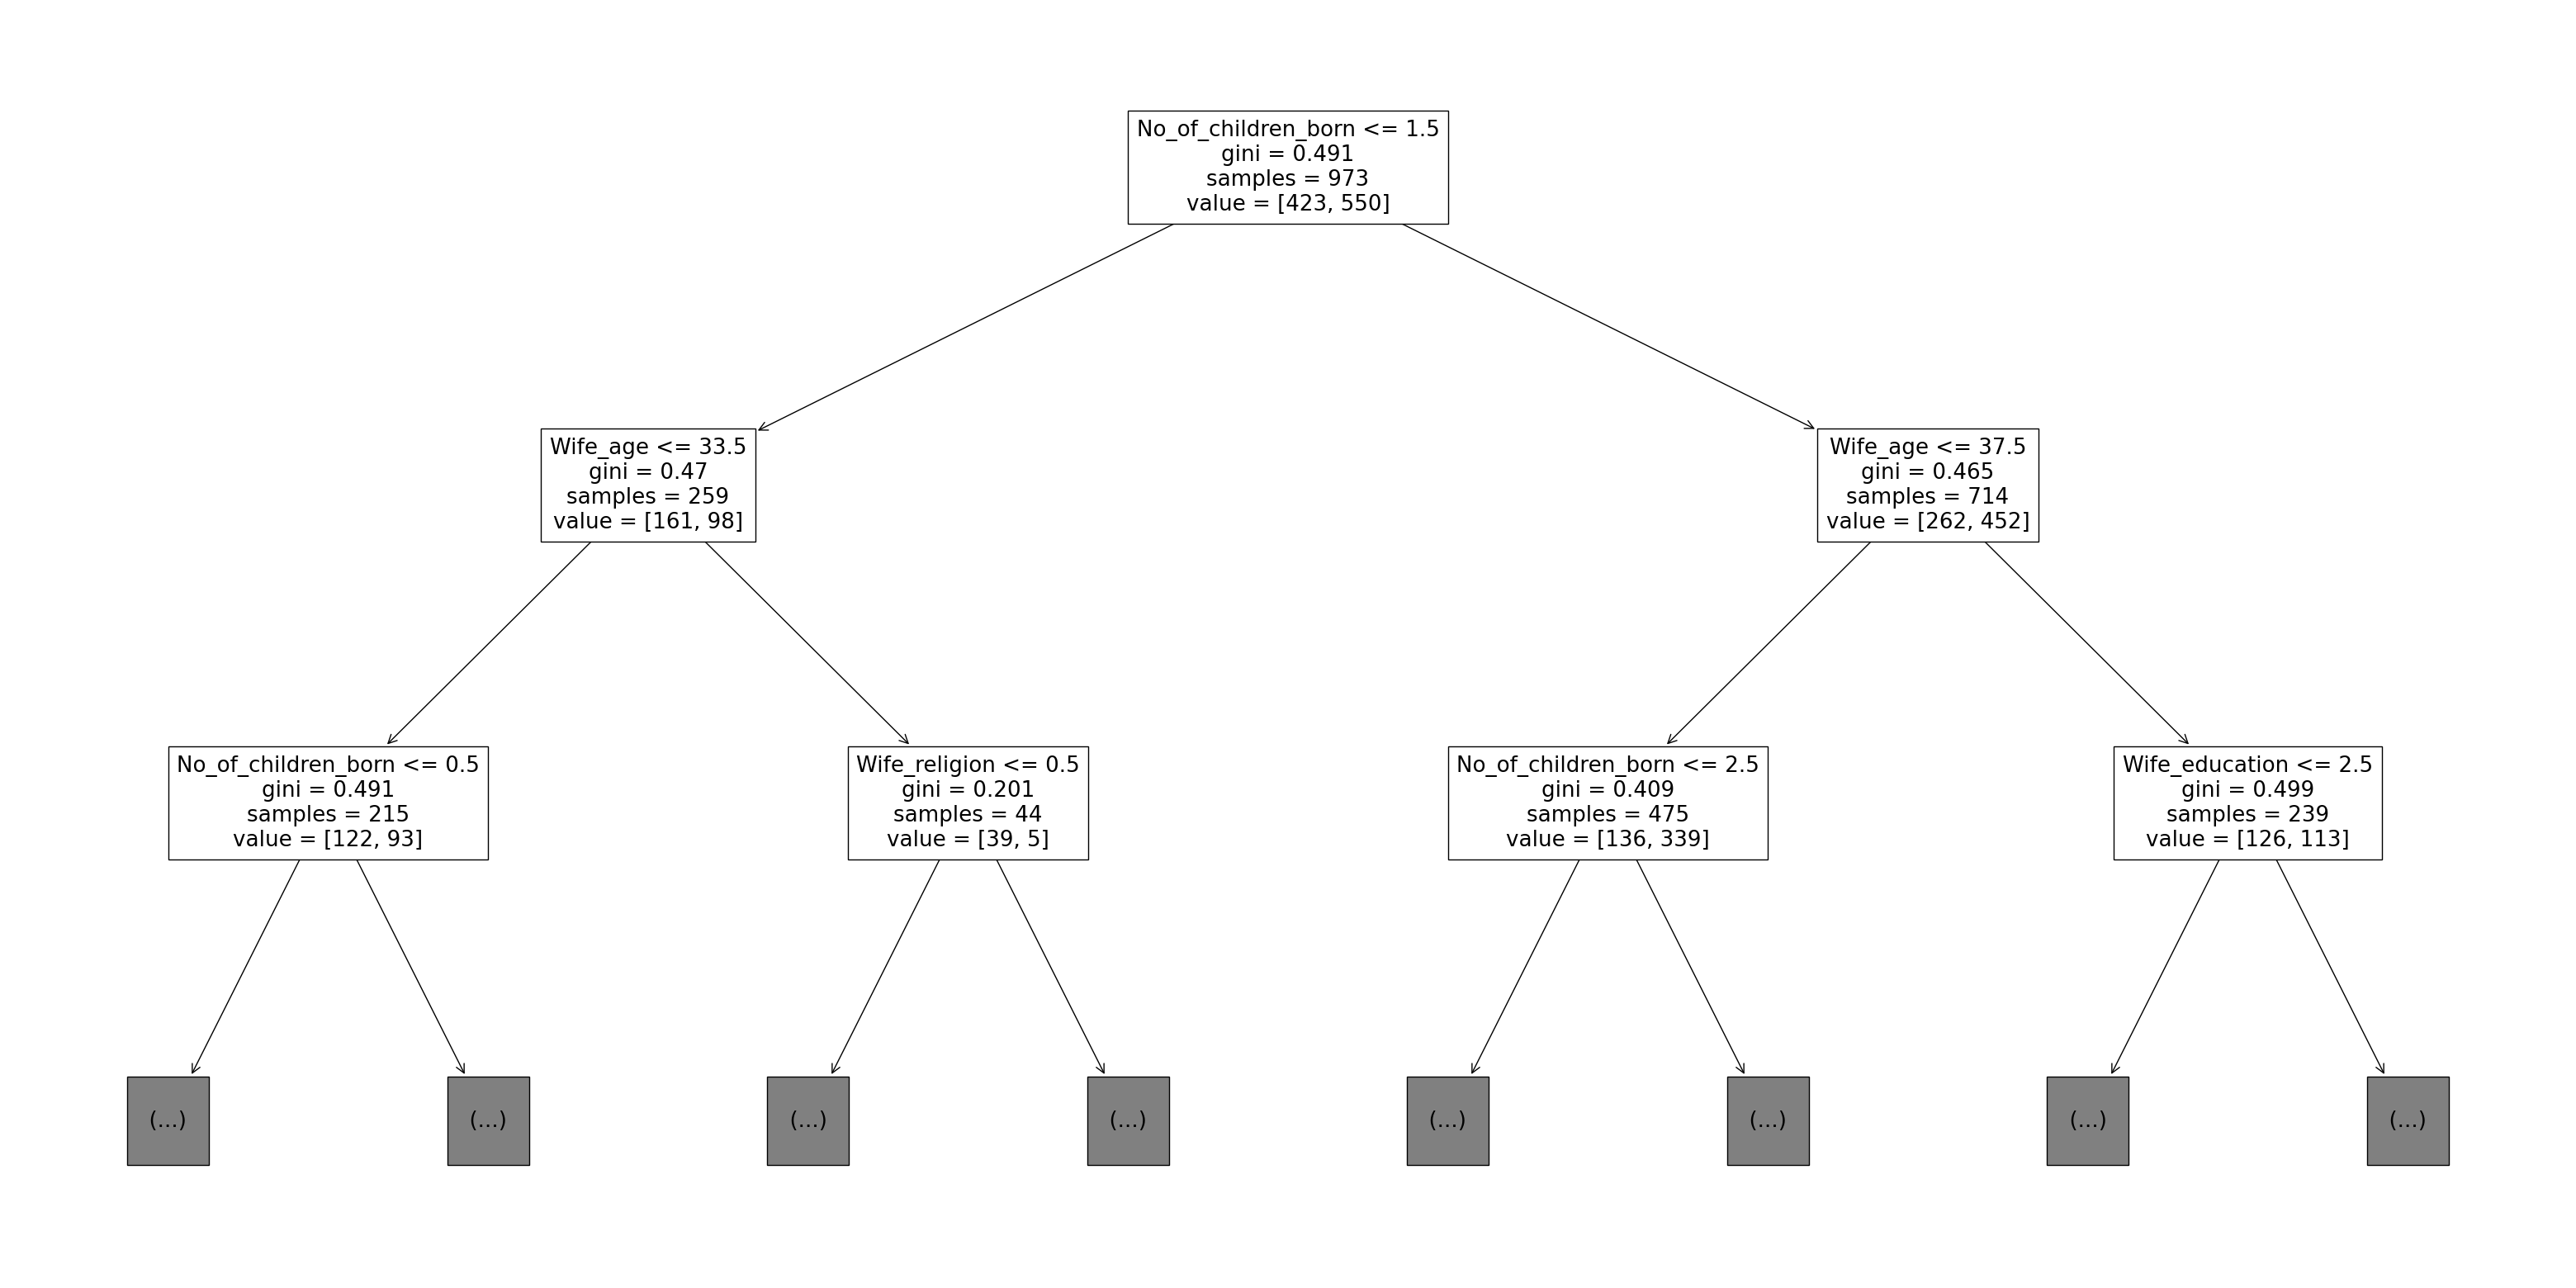

In [1639]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(dt_model,feature_names=X.columns,max_depth = 2)
#plt.savefig('tree.png',dpi=300)

In [1640]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [1641]:
v_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)

In [1642]:
v_imp

,Imp
Wife_age,0.328969
No_of_children_born,0.171066
Wife_education,0.128195
Standard_of_living_index,0.102563
Husband_Occupation,0.100894
Husband_education,0.068860
Wife_Working,0.050528
Wife_religion,0.029139
Media_exposure,0.019785


In [1643]:
#predict training data
y_train_pred = dt_model.predict(X_train)

#predict test data
y_test_pred = dt_model.predict(X_test)

In [1644]:
#predicted probabilities on training and test data

y_train_predict_prob =dt_model.predict_proba(X_train)
print(pd.DataFrame(y_train_predict_prob).head())

y_test_predict_prob=dt_model.predict_proba(X_test)
print(pd.DataFrame(y_test_predict_prob).head())

     0    1
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.5  0.5
4  1.0  0.0
     0    1
0  1.0  0.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  1.0  0.0


In [1645]:
y_train_predict_prob1 = y_train_predict_prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train, y_train_predicted_prob1)
print('AUC ROC score for training data:', auc)

y_test_predict_prob1 = y_test_predict_prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test, y_test_predict_prob1)
print('AUC ROC score for test data:', auc)

#model has overfitted.

AUC ROC score for training data: 0.7672748764238126
AUC ROC score for test data: 0.5832136403651021


In [1646]:
#Accuracy of model on training data
print('Accuracy of decision tree model on training data:', dt_model.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of decision tree on test data:', dt_model.score(X_test, y_test))

Accuracy of decision tree model on training data: 0.9825282631038027
Accuracy of decision tree on test data: 0.580335731414868


In [1647]:
#regularizing the decision tree using different parameters.

maxDepth = 30
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = maxDepth, min_samples_leaf=10,min_samples_split=10, random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=10,
                       random_state=1)

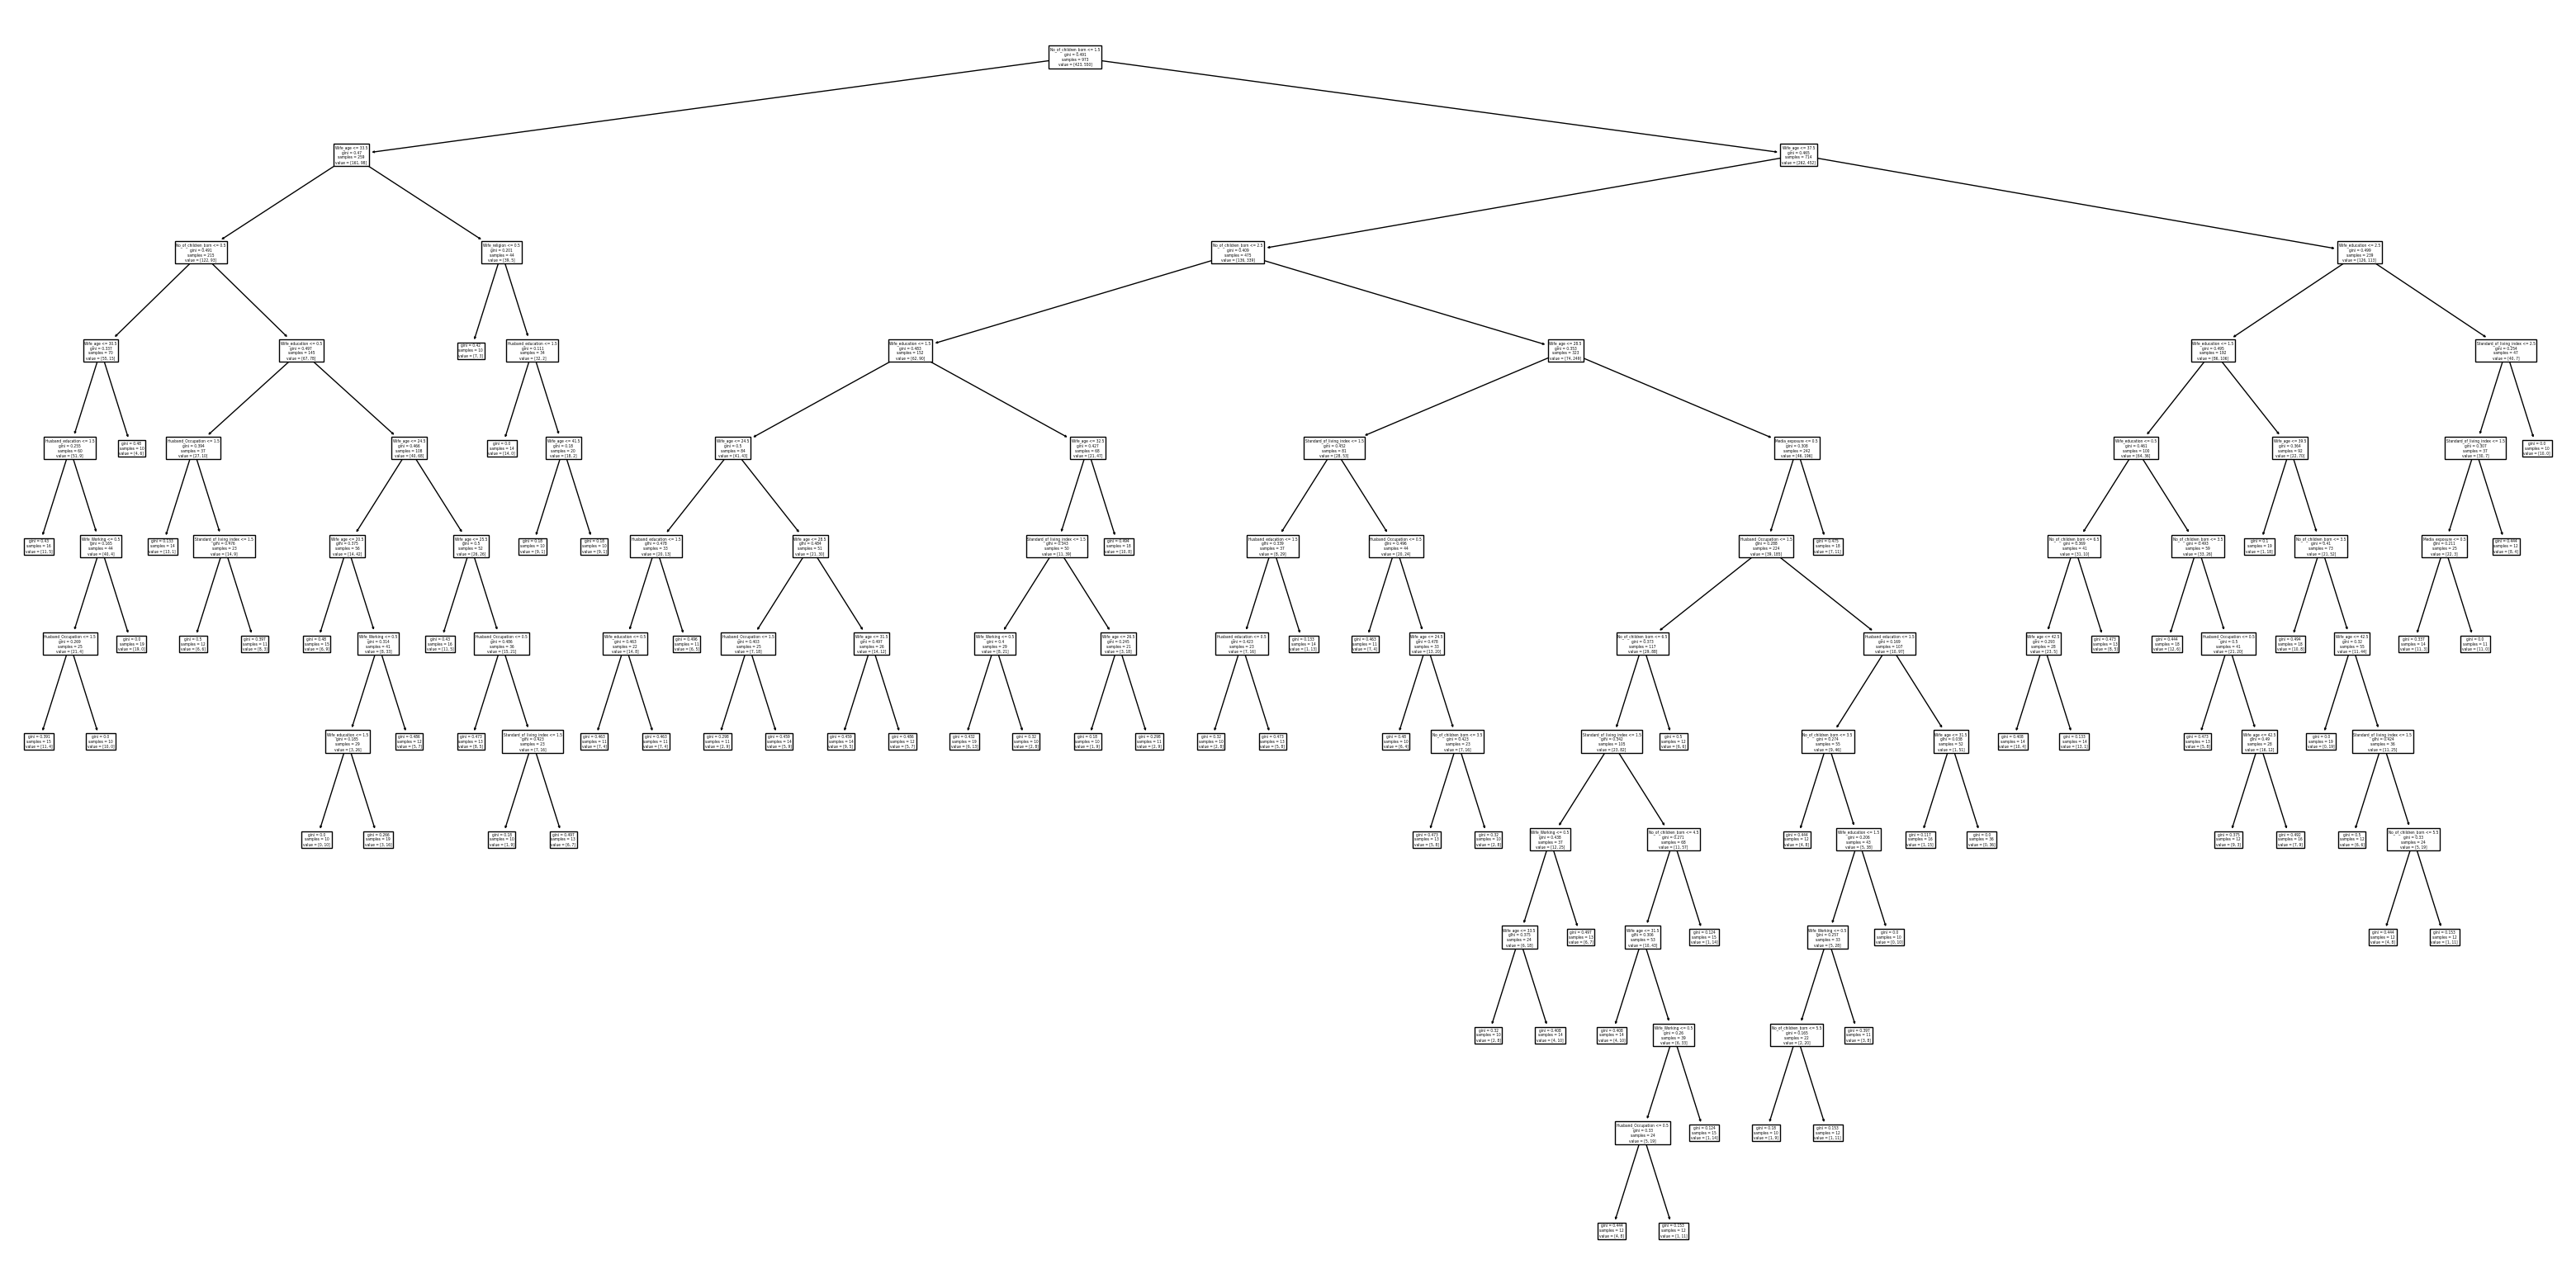

In [1648]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(reg_dt_model,feature_names=X.columns)

In [1649]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [1650]:
v_imp2 = pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)
print(v_imp2)

                               Imp
Wife_age                  0.307578
No_of_children_born       0.290978
Wife_education            0.231368
Husband_Occupation        0.056006
Standard_of_living_index  0.050708
Wife_Working              0.023300
Husband_education         0.022593
Media_exposure            0.012237
Wife_religion             0.005231


In [1651]:
# Complete the below code
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [1652]:
#predicted probabilities on training and test data

y_train_predict_prob =reg_dt_model.predict_proba(X_train)
print(pd.DataFrame(y_train_predict_prob).head())

ytest_predict_prob=reg_dt_model.predict_proba(X_test)
print(pd.DataFrame(y_test_predict_prob).head())

          0         1
0  0.083333  0.916667
1  0.000000  1.000000
2  0.600000  0.400000
3  0.066667  0.933333
4  1.000000  0.000000
     0    1
0  1.0  0.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  1.0  0.0


In [1653]:
#Accuracy of model on training data
print('Accuracy of regularized decision tree model on training data:', reg_dt_model.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of regularized decision tree on test data:', reg_dt_model.score(X_test, y_test))

Accuracy of regularized decision tree model on training data: 0.7584789311408017
Accuracy of regularized decision tree on test data: 0.6546762589928058


In [1654]:
#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))

Classification report for training data:

              precision    recall  f1-score   support

           0       0.75      0.56      0.64       423
           1       0.72      0.85      0.78       550

    accuracy                           0.73       973
   macro avg       0.73      0.71      0.71       973
weighted avg       0.73      0.73      0.72       973

Classification report for test data:

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       191
           1       0.67      0.82      0.73       226

    accuracy                           0.68       417
   macro avg       0.69      0.67      0.66       417
weighted avg       0.68      0.68      0.67       417



[[238 185]
 [ 81 469]]
[[ 98  93]
 [ 41 185]]


C:\Users\yamin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


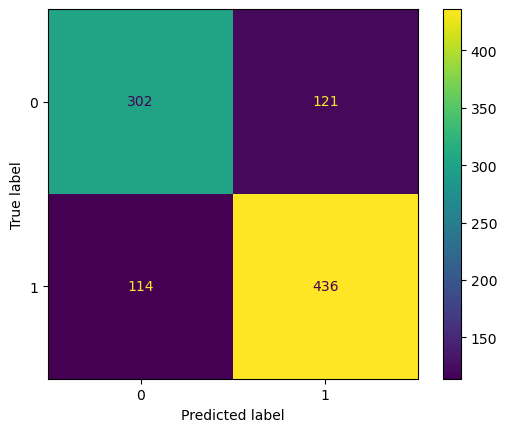

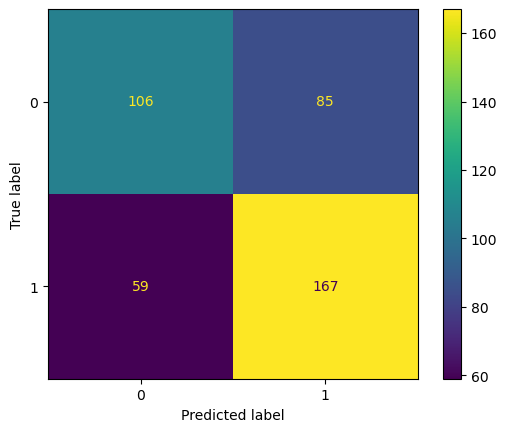

In [1655]:
#confusion matrix for training data
print(metrics.confusion_matrix(y_train, y_train_predicted))

print(metrics.plot_confusion_matrix(reg_dt_model, X_train, y_train));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))

print(metrics.plot_confusion_matrix(reg_dt_model, X_test, y_test))

AUC 0.7672748764238126


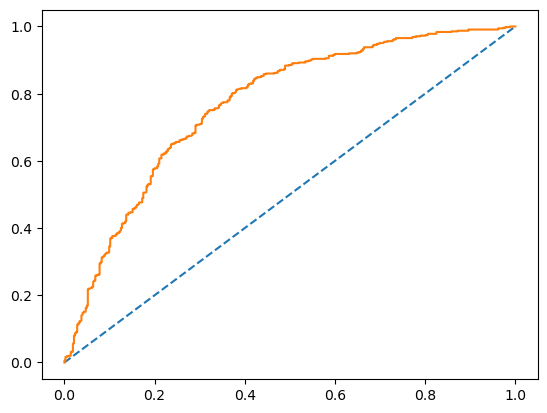

In [1656]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = roc_auc_score(y_train, y_train_predicted_prob1)
print('AUC', auc)
# calculate roc curve
train_fpr, train_tpr , _ = roc_curve(y_train, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC 0.7250034749571421


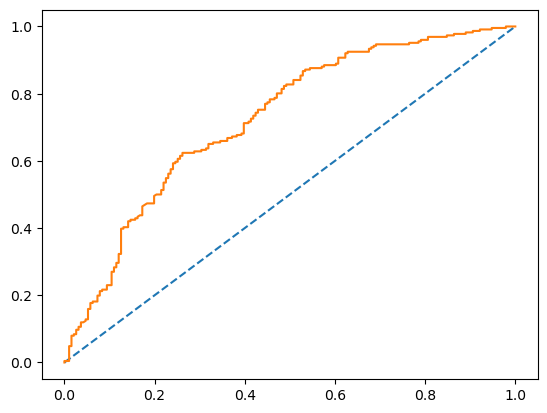

In [1657]:
#ROC curve on test data
#ROC_AOC curve on test data

#ROC curve on training data
#ROC_AUC score on training data

#y_test_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC', auc)
# calculate roc curve
train_fpr, train_tpr , _ = roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);